# Plot

## Librairies

In [136]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import re

import numpy as np
import pandas as pd
import pickle

from source.bgt_network import *
from source.network import *
from source.attractors import *
from optim.simulated_annealing import *

import matplotlib.pyplot as plt
# plt.style.use('ggplot')

## Preliminary function

In [137]:
def compute_abs_diffs(synapses_l):

    abs_diff_l = []

    for i in range(len(synapses_l)-1):

        abs_diff = np.sum(np.abs(synapses_l[i+1] - synapses_l[i]))
        abs_diff_l.append(abs_diff)

    return abs_diff_l

## Plots `nb_attractors vs nb_inputs`

In [138]:
def get_nb_attr_mean(file):

    with open(file, "rb") as fh:
        results = pickle.load(fh)
        nb_attractors = results[0]
        #return np.mean(nb_attractors).item()
        return nb_attractors

In [139]:
file = "sim_random_4nodes/sim_random_stdp_1001_50_1_seed83_eta0.1.pkl"
# get_nb_attr_mean(file)

In [140]:
file = "sim_random_4nodes/sim_random_stdp_1001_50_0_seed83_eta0.1.pkl"

# nb_inputs after "50"
match_50_ = re.search(r'50_(\d+)', file)
nb_inputs = match_50_.group(1) if match_50_ else None
nb_inputs = int(nb_inputs)

# eta after "eta"
match_eta = re.search(r'eta([\d.]+)(?!\w)', file)
eta = match_eta.group(1) if match_eta else None                
eta = float(eta)

nb_inputs, eta

(0, 0.1)

In [141]:
results = {}

rootdir = "."

for folder in os.listdir(rootdir):
    
    if os.path.isdir(folder) and folder.startswith("sim"):

        key = folder.split("_")[-1]
        results[key] = {}
        print(f"Folder {key} done.")
    
        for file in os.listdir(folder):
            
            if "stdp-gp" in file or "_0_" in file:

                # eta after "eta"
                match_eta = re.search(r'eta([\d.]+)(?!\w)', file)
                eta = match_eta.group(1) if match_eta else None                
                eta = float(eta)

                if eta not in results[key]:
                    results[key][eta] = {}
                    
                # nb_inputs after "50"
                match_50_ = re.search(r'50_(\d+)', file)
                nb_inputs = match_50_.group(1) if match_50_ else None
                nb_inputs = int(nb_inputs)

                if nb_inputs not in results[key][eta]:
                    results[key][eta][nb_inputs] = []

                filepath = os.path.join(folder, file)
                nb_attrs = get_nb_attr_mean(filepath)
                results[key][eta][nb_inputs].extend(nb_attrs)

Folder 7nodes done.
Folder 6nodes done.
Folder 5nodes done.
Folder bgt done.
Folder 4nodes done.


In [142]:
def plot(results, key="4nodes", mode="mean", save=False):

    plt.figure(figsize=(5,3))
    
    etas = list(results[key].keys())
    etas.sort()

    # missing experiment from eta=0.1
    if key == "bgt":
        etas.pop()
    
    for eta in etas:
        
        nb_inputs = list(results[key][eta].keys())
        nb_inputs.sort()
        if mode == "mean":
            nb_attrs = [np.mean(results[key][eta][n]) for n in nb_inputs]
        elif mode == "max":
            nb_attrs = [np.max(results[key][eta][n]) for n in nb_inputs]
        plt.plot(nb_inputs, nb_attrs, linewidth=2, label=rf"$\eta={eta}$")

    plt.xlabel("nb of triggers", fontsize=12)
    plt.xticks(nb_inputs)
    plt.ylabel("nb of attractors", fontsize=12)
    plt.legend(loc="upper left", fontsize=10)
    if save:
        string = "random_" if key != "bgt" else ""
        plt.savefig(f"plots/plots_{string}{key}/nb_attr_{mode}_{key}.pdf")
    plt.show()

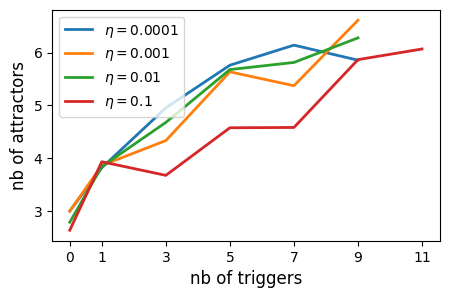

In [143]:
 plot(results, key="4nodes", mode="mean", save=True)

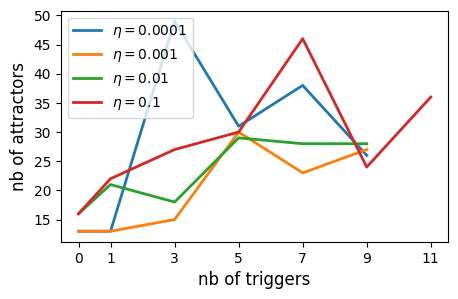

In [144]:
 plot(results, key="4nodes", mode="max", save=True)

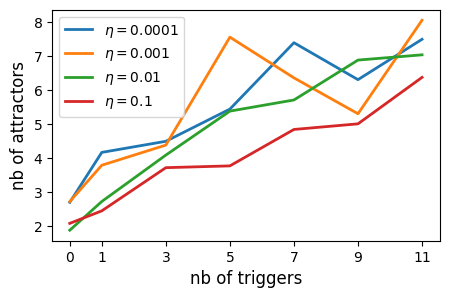

In [145]:
 plot(results, key="5nodes", mode="mean", save=True)

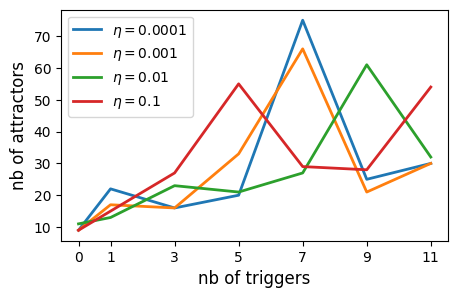

In [146]:
 plot(results, key="5nodes", mode="max", save=True)

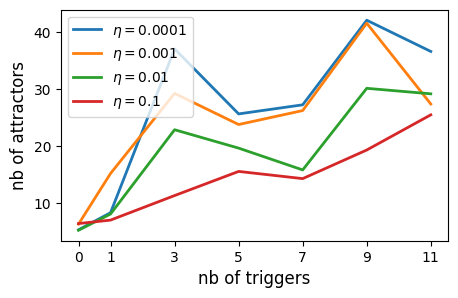

In [147]:
 plot(results, key="6nodes", mode="mean", save=True)

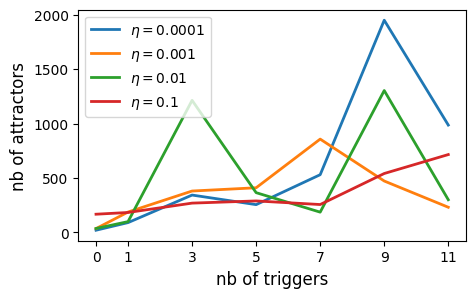

In [148]:
 plot(results, key="6nodes", mode="max", save=True)

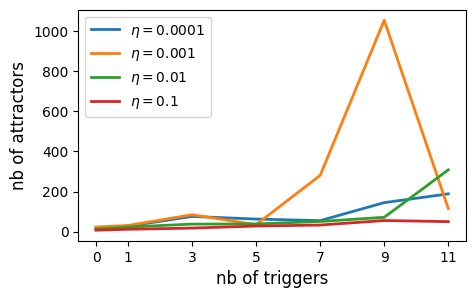

In [149]:
 plot(results, key="7nodes", mode="mean", save=True)

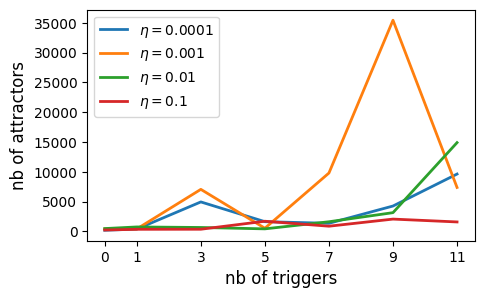

In [150]:
 plot(results, key="7nodes", mode="max", save=True)

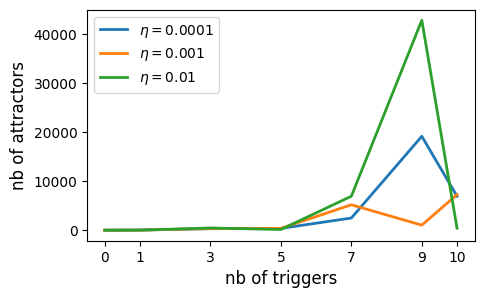

In [151]:
 plot(results, key="bgt", mode="mean", save=True)

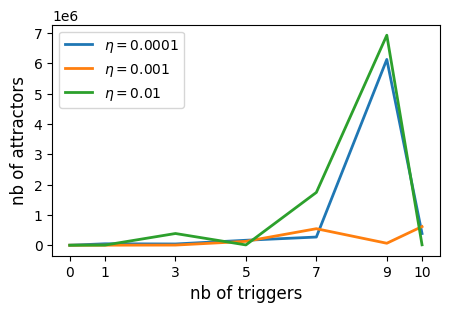

In [152]:
 plot(results, key="bgt", mode="max", save=True)

## Plots `drops and jumps`

In [211]:
def get_drops_and_jumps(file):

    with open(file, "rb") as fh:
        results = pickle.load(fh)
        nb_attrs = results[0]
        nb_attrs = [int(n) for n in nb_attrs]
        ticks = results[1]

        drops = []
        for i, t in enumerate(ticks):
            if i < len(ticks) - 1:
                before_next_tick = nb_attrs[ticks[i+1]-1]
            else:
                before_next_tick = nb_attrs[-1]
            n_t0, n_t1 = nb_attrs[t+50], before_next_tick
            drops.append(n_t1 - n_t0)
            
        jumps = []
        for t in range(len(ticks)):
            n_t0, w = nb_attrs[ticks[t]-1], nb_attrs[ticks[t]:ticks[t]+51]
            jumps.append(max(w) - n_t0)
    
        return drops, jumps

In [212]:
file = "sim_random_7nodes/sim_random_stdp-gp_1001_50_9_seed13_eta0.01.pkl"
jumps, drops = get_drops_and_jumps(file)
jumps, drops

([-74, -686, -1058, -37, -648, -3033, -34, -1963, -106],
 [33, 641, 1032, 0, 915, 2816, 0, 1919, 119])

In [213]:
results = {}

rootdir = "."

for folder in os.listdir(rootdir):
    
    if os.path.isdir(folder) and folder.startswith("sim"):

        key = folder.split("_")[-1]
        results[key] = {}
        print(f"Folder {key} done.")
    
        for file in os.listdir(folder):
            
            if file.startswith("sim_random_stdp-gp_1001_50_11") or file.startswith("sim_bgt_stdp-gp_1001_50_10"):

                # eta after "eta"
                match_eta = re.search(r'eta([\d.]+)(?!\w)', file)
                eta = match_eta.group(1) if match_eta else None                
                eta = float(eta)

                if eta not in results[key]:
                    results[key][eta] = {"drops": [], "jumps": []}

                filepath = os.path.join(folder, file)
                drops, jumps = get_drops_and_jumps(filepath)
                results[key][eta]["drops"].extend(drops)
                results[key][eta]["jumps"].extend(jumps)

Folder 7nodes done.
Folder 6nodes done.
Folder 5nodes done.
Folder bgt done.
Folder 4nodes done.


In [214]:
results["5nodes"].keys(), results["6nodes"].keys(), results["7nodes"].keys(), results["bgt"].keys()

(dict_keys([0.0001, 0.1, 0.001, 0.01]),
 dict_keys([0.0001, 0.1, 0.001, 0.01]),
 dict_keys([0.0001, 0.1, 0.001, 0.01]),
 dict_keys([0.1, 0.0001, 0.001, 0.01]))

In [215]:
np.mean(results["7nodes"][0.01]["drops"]).item(), np.mean(results["7nodes"][0.01]["jumps"]).item()

(-228.8, 244.8090909090909)

In [219]:
df = {}

for key in ["5nodes", "6nodes", "7nodes", "bgt"]:
    df[key] = {}
    for eta in [0.1, 0.01, 0.001, 0.0001]:
        drop = np.mean(results[key][eta]["drops"]).round(1).item()
        jump = np.mean(results[key][eta]["jumps"]).round(1).item()
        df[key][eta] = (drop, jump)

In [220]:
df_tex = pd.DataFrame.from_dict(df).to_latex()

In [221]:
print(df_tex)

\begin{tabular}{lllll}
\toprule
 & 5nodes & 6nodes & 7nodes & bgt \\
\midrule
0.100000 & (-3.8, 4.3) & (-16.7, 19.1) & (-71.0, 72.8) & (-10561.0, 10592.4) \\
0.010000 & (-2.9, 3.1) & (-13.8, 17.1) & (-228.8, 244.8) & (-1121.0, 1137.2) \\
0.001000 & (-2.4, 3.0) & (-12.1, 14.2) & (-161.2, 169.4) & (-25818.1, 25831.6) \\
0.000100 & (-2.3, 2.7) & (-24.4, 26.8) & (-96.0, 157.0) & (-22907.1, 22923.0) \\
\bottomrule
\end{tabular}



## Plot for mode `stdp`

In [124]:
network = "random" # "bgt" "random"

In [125]:
filename = f"sim_{network}_stdp_1001_50_9_seed13_eta0.1.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [126]:
nb_attractors, synapses_l = results[0], results[1]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[3])

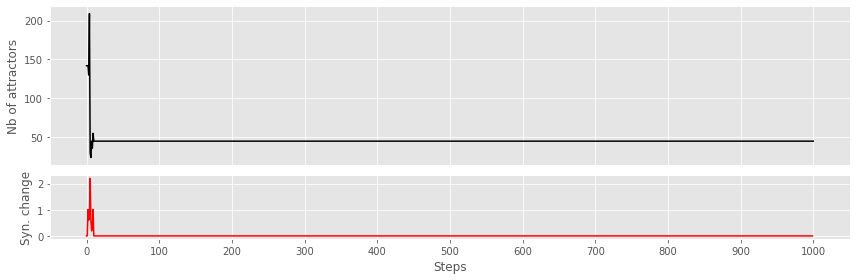

In [127]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
# ## Add colored regions for each input chunk
# for start, end in zip(t0s, t1s):
#     ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
# plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `gp`

In [128]:
filename = f"sim_{network}_gp_1001_50_9_seed13_eta0.1.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [129]:
nb_attractors = results[0][1:] # remove first element (initial A)
nb_attractors = [-x for x in nb_attractors]
input_length = int(filename.split("_")[3])

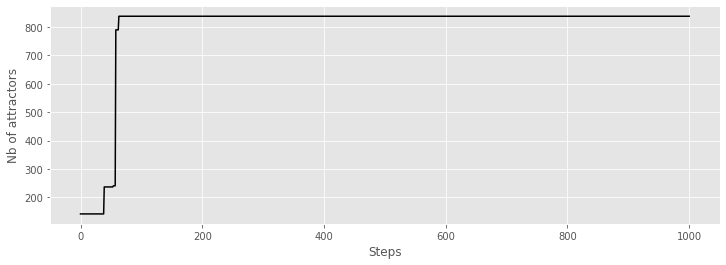

In [130]:
plt.figure(figsize=(12, 4))

# Plot number of attractors
plt.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
plt.xlabel('Steps', size=12)
plt.ylabel('Nb of attractors', size=12)
plt.grid(True)

fig.tight_layout()
# plt.savefig("plots/STDP_19.pdf")
plt.show()

## Plot for mode `stdp-gp`

In [131]:
filename = f"sim_{network}_stdp-gp_1001_50_9_seed13_eta0.1.pkl"

with open(filename, "rb") as fh:
    results = pickle.load(fh)

In [132]:
nb_attractors, ticks, synapses_l = results[0], results[1], results[2]
abs_diff_l = compute_abs_diffs(synapses_l)
input_length = int(filename.split("_")[3])
target_length = int(filename.split("_")[4])

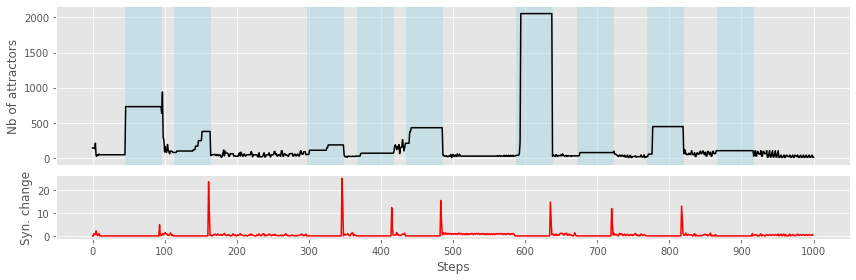

In [133]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

# Chunks start and end points
t0s = ticks
t1s = [start + target_length for start in t0s]

# Plot number of attractors
ax1.plot(range(input_length), nb_attractors, color='black', label='Number of Attractors')
ax1.set_ylabel('Nb of attractors', size=12)
ax1.grid(True)
ax1.tick_params(bottom = False) 
## Add colored regions for each input chunk
for start, end in zip(t0s, t1s):
    ax1.axvspan(start, end, color='lightblue', alpha=0.5, label="input streams" if start == t0s[0] else "")

# Plot synaptic abs changes
ax2.plot(range(input_length-1), abs_diff_l, color='red', alpha=1)
ax2.set_xlabel('Steps', size=12)
ax2.set_ylabel('Syn. change', size=12)
ax2.set_xticks(range(0, input_length, 100))
ax2.tick_params(axis='y')
ax2.grid(True)

fig.tight_layout()
# plt.savefig("plots/STDP_19.pdf")
plt.show()

## Combined plots

In [134]:
def get_results(filespecs=(1001, 50, 10, 42, 0.01)):

    input_length = filespecs[0]
    trigger_length = filespecs[1]
    nb_triggers = filespecs[2]
    seed = filespecs[3]
    eta = filespecs[4]

    results_d = {}

    for mode in ["stdp", "gp", "stdp-gp"]:

        results_d[mode] = {}

        if mode == "gp":

            filename = f"sim_{network}_{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}_eta{eta}.pkl"
            print(filename)

            with open(filename, "rb") as fh:
                results = pickle.load(fh)

            nb_attractors = results[0][-input_length:]  # remove initial value if needed
            nb_attractors = (-np.array(nb_attractors)).tolist()
            results_d[mode]["nb_attractors"] = nb_attractors

        elif mode == "stdp":
            
            filename = f"sim_{network}_{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}_eta{eta}.pkl"
            
            with open(filename, "rb") as fh:
                results = pickle.load(fh)

            nb_attractors = results[0][-input_length:]
            results_d[mode]["nb_attractors"] = nb_attractors
            synapses_l = results[1]
            abs_diff_l = compute_abs_diffs(synapses_l)
            results_d[mode]["syn_change"] = abs_diff_l

        elif  mode == "stdp-gp":

            filename = f"sim_{network}_{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}_eta{eta}.pkl"

            with open(filename, "rb") as fh:
                results = pickle.load(fh)

            nb_attractors = results[0][-input_length:]
            results_d[mode]["nb_attractors"] = nb_attractors
            ticks = results[1]
            results_d[mode]["ticks"] = ticks
            synapses_l = results[2]
            abs_diff_l = compute_abs_diffs(synapses_l)
            results_d[mode]["syn_change"] = abs_diff_l

    return results_d

In [135]:
def plot(results_d, filespecs, save=True):
    
    input_length = filespecs[0]
    trigger_length = filespecs[1]
    nb_triggers = filespecs[2]
    seed = filespecs[3]
    eta = filespecs[4]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 4), sharex=True, gridspec_kw={'height_ratios': [1, 0.4]})

    # Chunks start and end points
    t0s = results_d["stdp-gp"]["ticks"]
    t1s = [start + trigger_length for start in t0s]

    # Plot number of attractors
    max_gp = max(results_d["gp"]["nb_attractors"])
    ax1.plot(range(input_length), results_d["stdp-gp"]["nb_attractors"], linewidth=2, color="black", label='STDP-GP')
    ax1.plot(range(input_length), results_d["stdp"]["nb_attractors"], linewidth=1, linestyle="--", color="purple", label='STDP')
    ax1.plot(range(input_length), [0]*input_length, linewidth=0, color="black", label=f"simul. ann.: {max_gp}") # fictive plot for legend
    ax1.set_ylabel('Nb of attractors', size=12)
    ax1.grid(True)
    ax1.tick_params(bottom = False) 
    ## Add colored regions for each input chunk
    for start, end in zip(t0s, t1s):
        ax1.axvspan(start, end, color='lightblue', alpha=0.75, label="input streams" if start == t0s[0] else "")
    ax1.legend(loc="upper left")

    # Plot synaptic abs changes
    ax2.plot(range(input_length-1), results_d["stdp-gp"]["syn_change"], color='red', alpha=1)
    ax2.set_xlabel('Steps', size=12)
    ax2.set_ylabel('Syn. change', size=12)
    ax2.set_xticks(range(0, input_length, 100))
    ax2.tick_params(axis='y')
    ax2.grid(True)

    fig.tight_layout()
    if save:
        plt.savefig(f"plots/plot_{network}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}_eta{eta}.pdf")
    plt.show()

sim_random_gp_1001_50_7_seed13_eta0.1.pkl


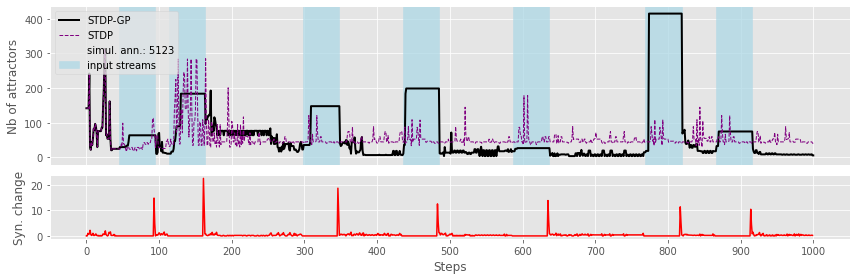

In [136]:
filespecs = [1001, 50, 7, 13, 0.1]
results_d = get_results(filespecs)
plot(results_d, filespecs)

*** nb inputs 1 / eta 0.1 / seed 42 ***
sim_random_gp_1001_50_1_seed42_eta0.1.pkl


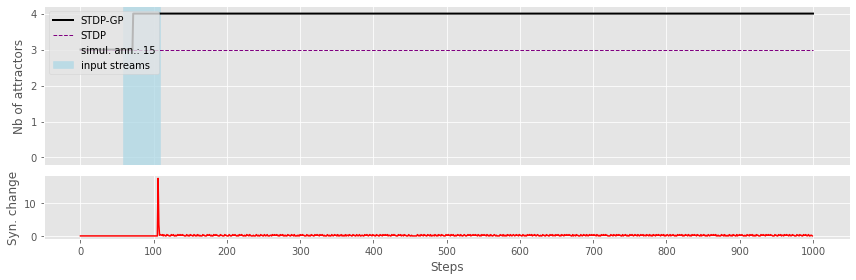

*** nb inputs 1 / eta 0.1 / seed 79 ***
sim_random_gp_1001_50_1_seed79_eta0.1.pkl


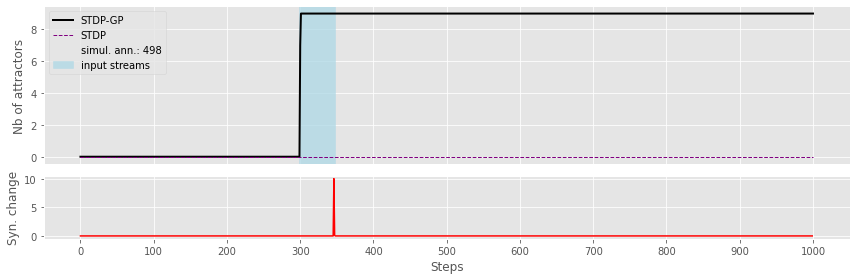

*** nb inputs 1 / eta 0.1 / seed 82 ***
sim_random_gp_1001_50_1_seed82_eta0.1.pkl


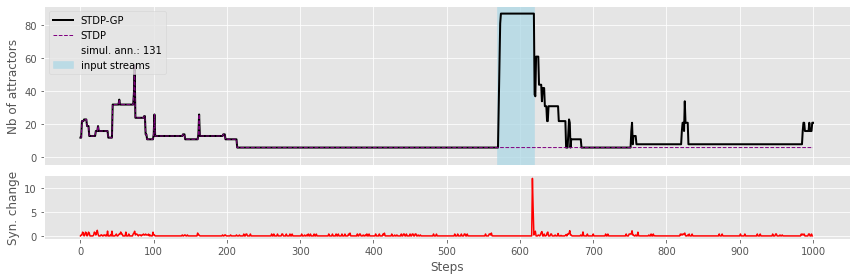

*** nb inputs 1 / eta 0.1 / seed 83 ***
sim_random_gp_1001_50_1_seed83_eta0.1.pkl


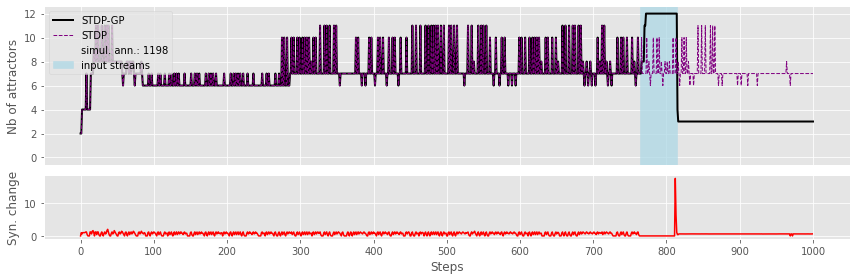

*** nb inputs 1 / eta 0.1 / seed 47 ***
sim_random_gp_1001_50_1_seed47_eta0.1.pkl


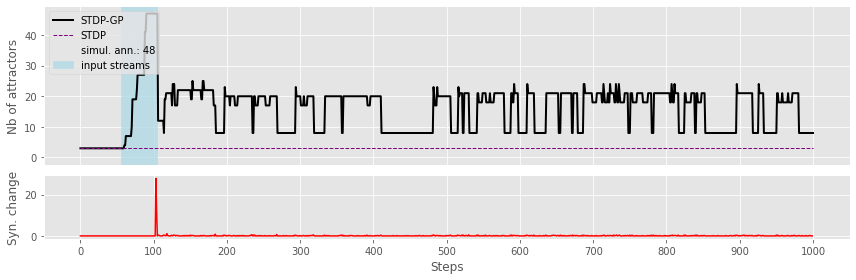

*** nb inputs 1 / eta 0.1 / seed 49 ***
sim_random_gp_1001_50_1_seed49_eta0.1.pkl


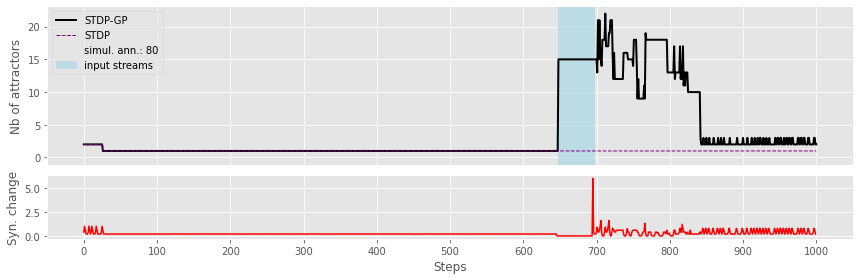

*** nb inputs 1 / eta 0.1 / seed 13 ***
sim_random_gp_1001_50_1_seed13_eta0.1.pkl


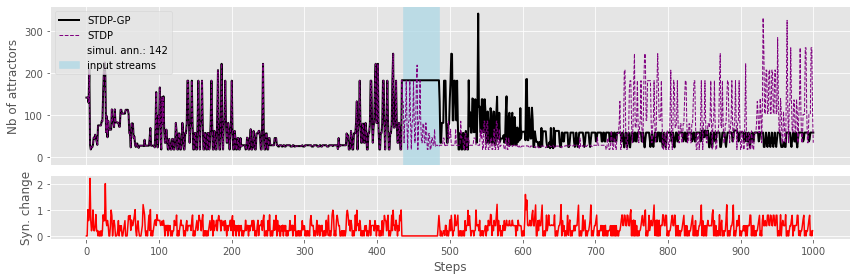

*** nb inputs 1 / eta 0.1 / seed 77 ***
sim_random_gp_1001_50_1_seed77_eta0.1.pkl


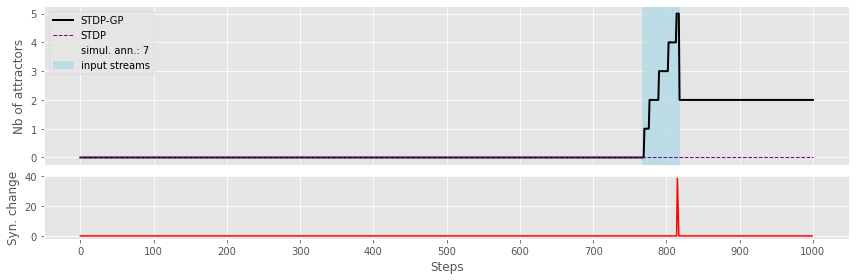

*** nb inputs 1 / eta 0.1 / seed 55 ***
sim_random_gp_1001_50_1_seed55_eta0.1.pkl


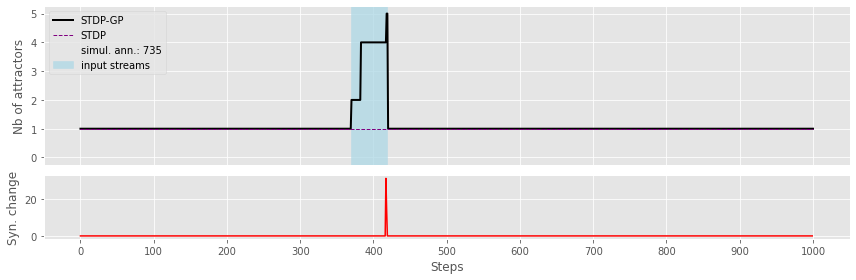

*** nb inputs 1 / eta 0.1 / seed 15 ***
sim_random_gp_1001_50_1_seed15_eta0.1.pkl


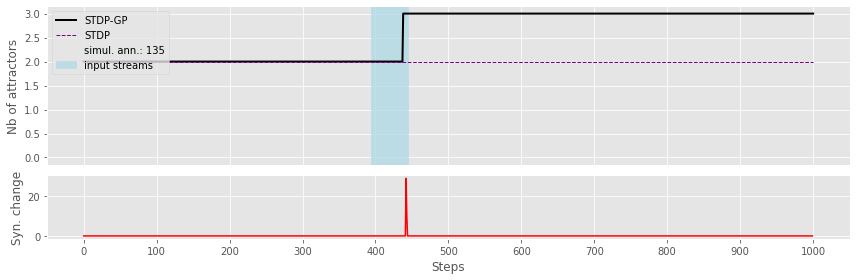

*** nb inputs 3 / eta 0.1 / seed 42 ***
sim_random_gp_1001_50_3_seed42_eta0.1.pkl


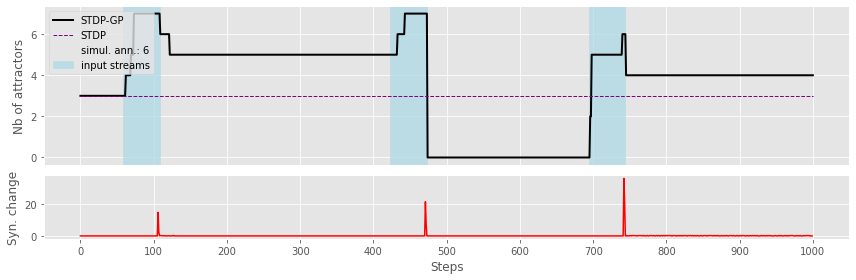

*** nb inputs 3 / eta 0.1 / seed 79 ***
sim_random_gp_1001_50_3_seed79_eta0.1.pkl


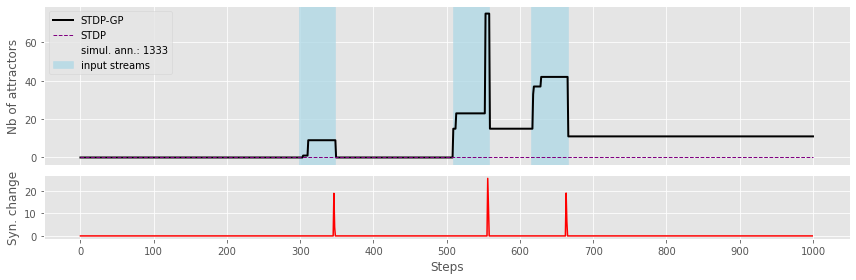

*** nb inputs 3 / eta 0.1 / seed 82 ***
sim_random_gp_1001_50_3_seed82_eta0.1.pkl


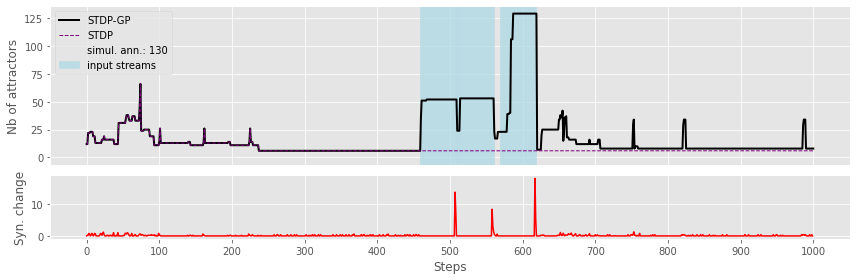

*** nb inputs 3 / eta 0.1 / seed 83 ***
sim_random_gp_1001_50_3_seed83_eta0.1.pkl


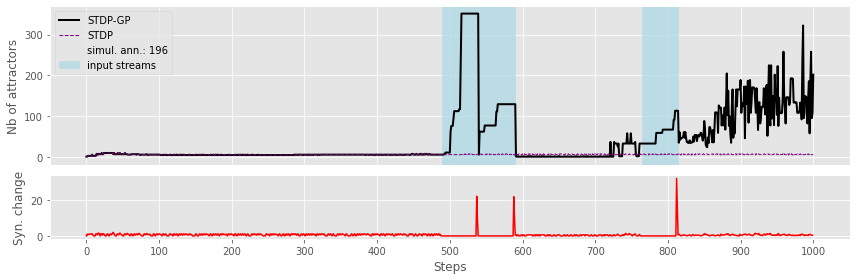

*** nb inputs 3 / eta 0.1 / seed 47 ***
sim_random_gp_1001_50_3_seed47_eta0.1.pkl


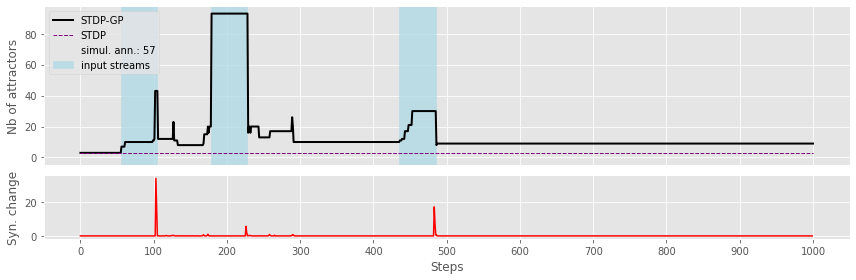

*** nb inputs 3 / eta 0.1 / seed 49 ***
sim_random_gp_1001_50_3_seed49_eta0.1.pkl


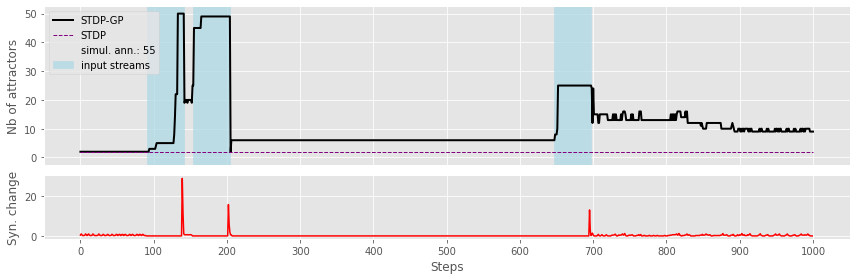

*** nb inputs 3 / eta 0.1 / seed 13 ***
sim_random_gp_1001_50_3_seed13_eta0.1.pkl


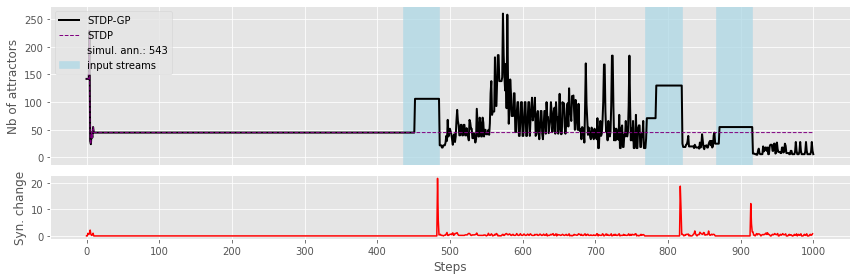

*** nb inputs 3 / eta 0.1 / seed 77 ***
sim_random_gp_1001_50_3_seed77_eta0.1.pkl


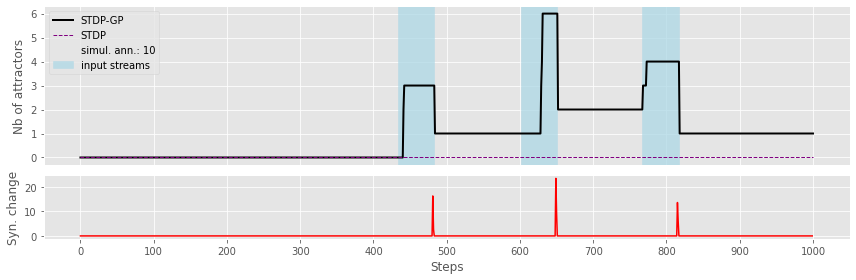

*** nb inputs 3 / eta 0.1 / seed 55 ***
sim_random_gp_1001_50_3_seed55_eta0.1.pkl


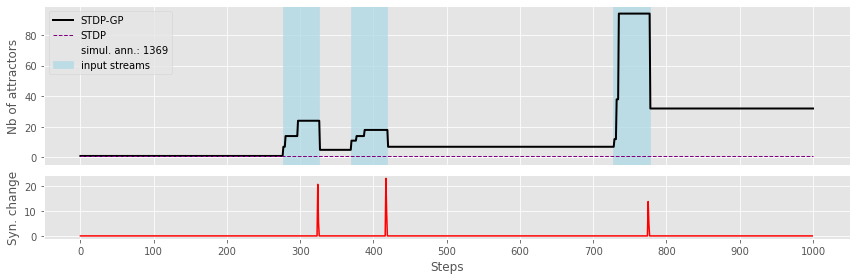

*** nb inputs 3 / eta 0.1 / seed 15 ***
sim_random_gp_1001_50_3_seed15_eta0.1.pkl


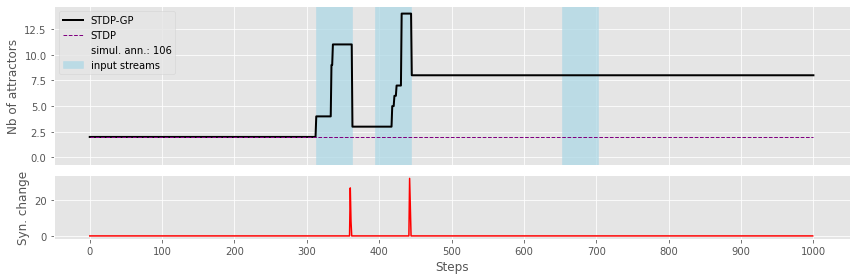

*** nb inputs 5 / eta 0.1 / seed 42 ***
sim_random_gp_1001_50_5_seed42_eta0.1.pkl


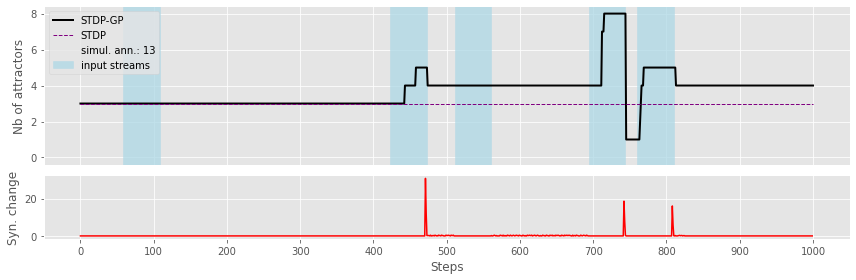

*** nb inputs 5 / eta 0.1 / seed 79 ***
sim_random_gp_1001_50_5_seed79_eta0.1.pkl


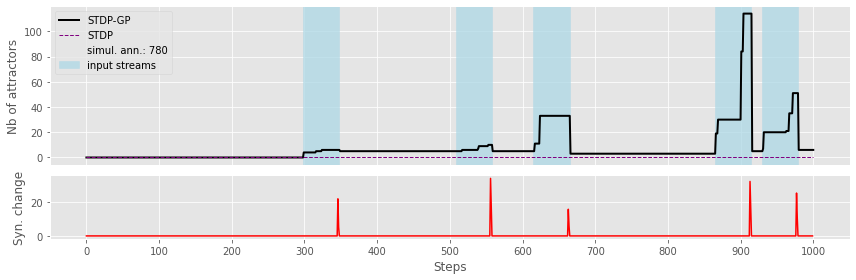

*** nb inputs 5 / eta 0.1 / seed 82 ***
sim_random_gp_1001_50_5_seed82_eta0.1.pkl


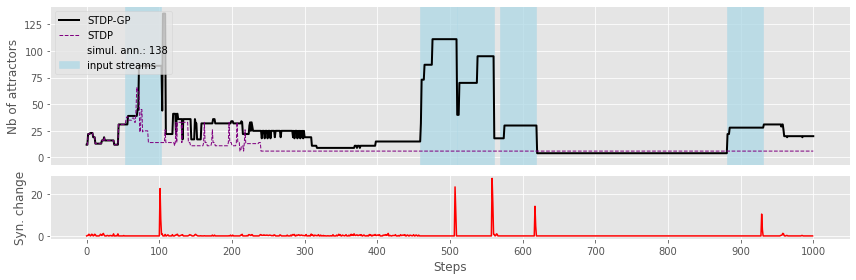

*** nb inputs 5 / eta 0.1 / seed 83 ***
sim_random_gp_1001_50_5_seed83_eta0.1.pkl


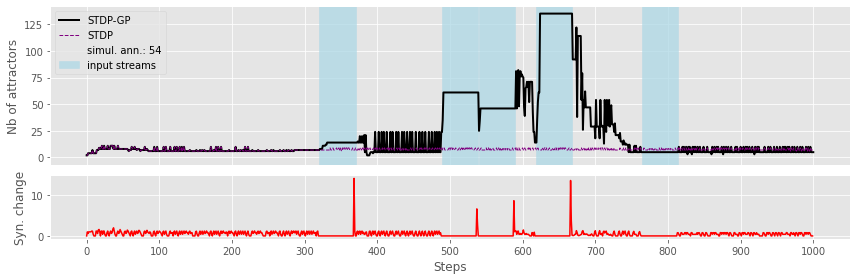

*** nb inputs 5 / eta 0.1 / seed 47 ***
sim_random_gp_1001_50_5_seed47_eta0.1.pkl


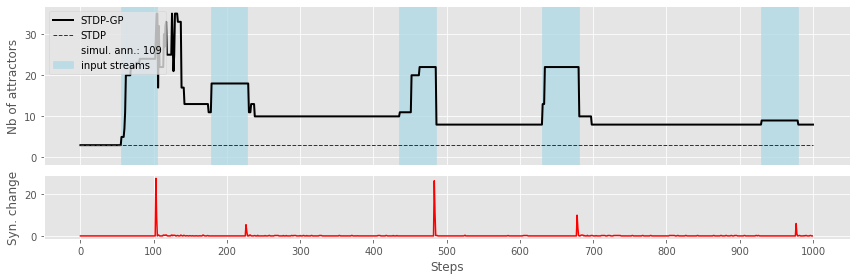

*** nb inputs 5 / eta 0.1 / seed 49 ***
sim_random_gp_1001_50_5_seed49_eta0.1.pkl


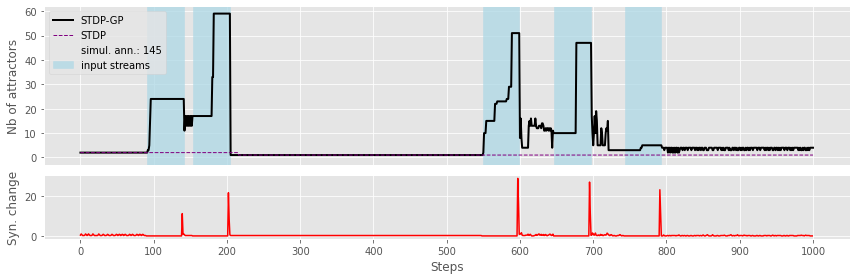

*** nb inputs 5 / eta 0.1 / seed 13 ***
sim_random_gp_1001_50_5_seed13_eta0.1.pkl


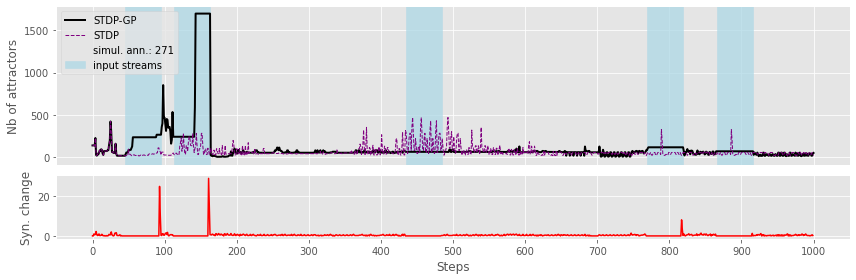

*** nb inputs 5 / eta 0.1 / seed 77 ***
sim_random_gp_1001_50_5_seed77_eta0.1.pkl


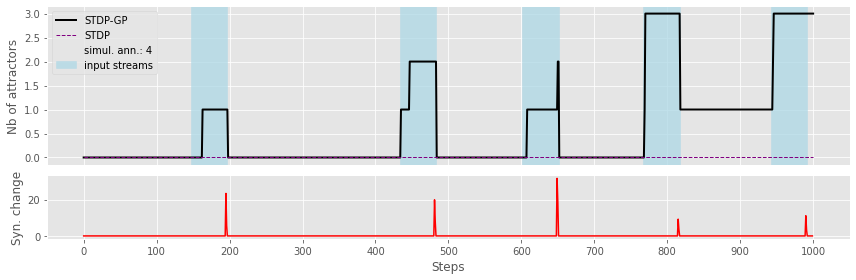

*** nb inputs 5 / eta 0.1 / seed 55 ***
sim_random_gp_1001_50_5_seed55_eta0.1.pkl


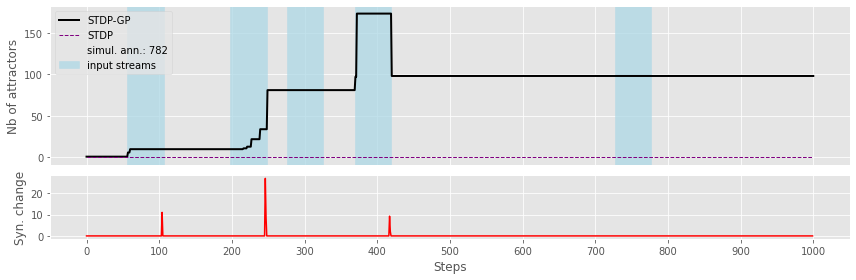

*** nb inputs 5 / eta 0.1 / seed 15 ***
sim_random_gp_1001_50_5_seed15_eta0.1.pkl


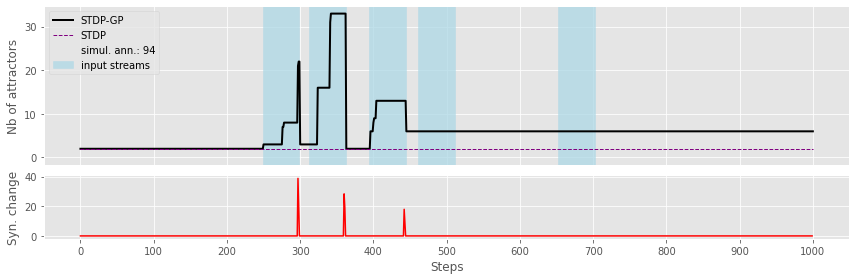

*** nb inputs 7 / eta 0.1 / seed 42 ***
sim_random_gp_1001_50_7_seed42_eta0.1.pkl


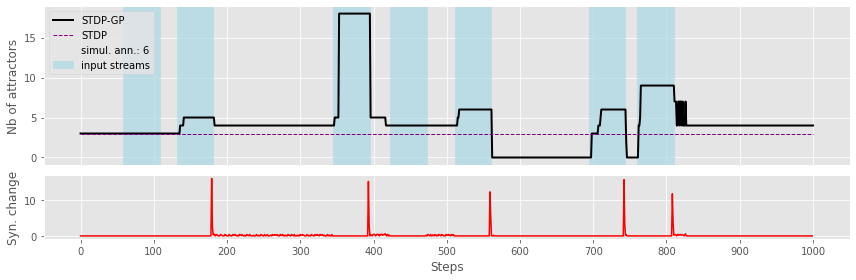

*** nb inputs 7 / eta 0.1 / seed 79 ***
sim_random_gp_1001_50_7_seed79_eta0.1.pkl


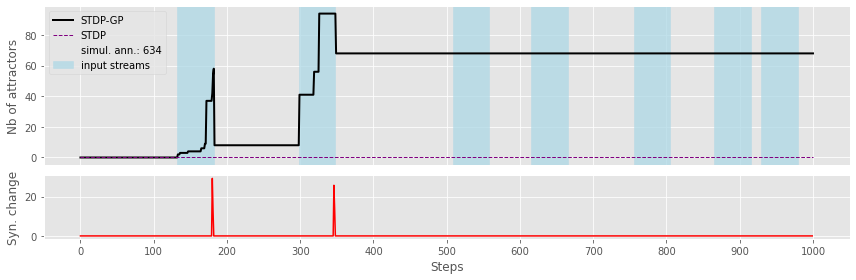

*** nb inputs 7 / eta 0.1 / seed 82 ***
sim_random_gp_1001_50_7_seed82_eta0.1.pkl


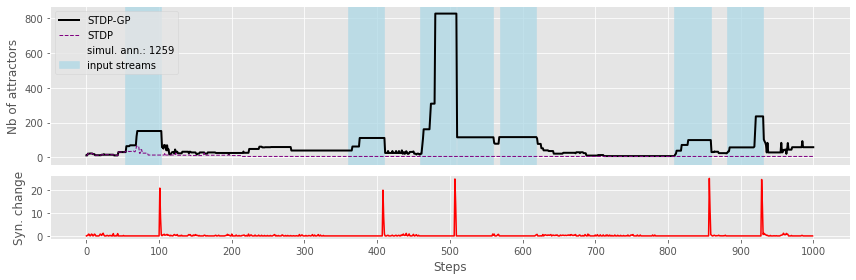

*** nb inputs 7 / eta 0.1 / seed 83 ***
sim_random_gp_1001_50_7_seed83_eta0.1.pkl


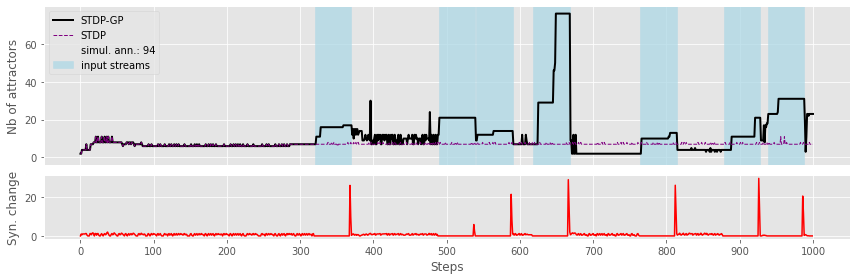

*** nb inputs 7 / eta 0.1 / seed 47 ***
sim_random_gp_1001_50_7_seed47_eta0.1.pkl


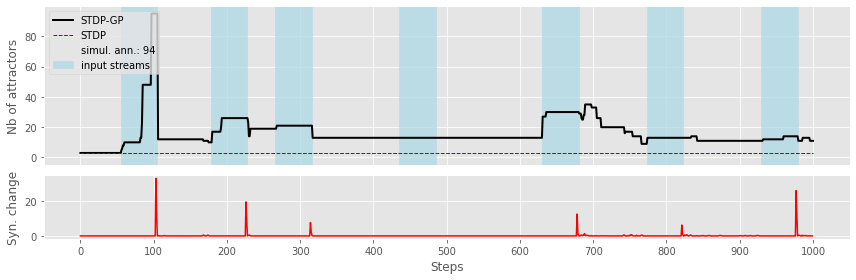

*** nb inputs 7 / eta 0.1 / seed 49 ***
sim_random_gp_1001_50_7_seed49_eta0.1.pkl


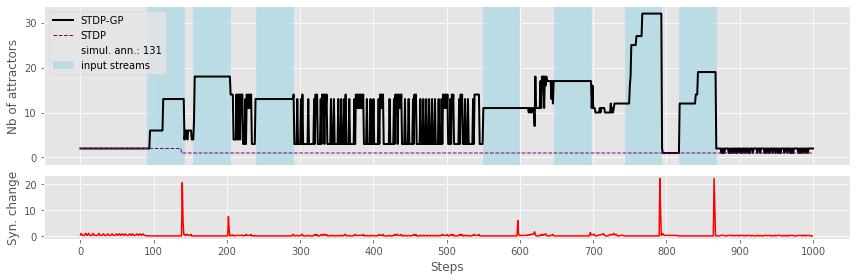

*** nb inputs 7 / eta 0.1 / seed 13 ***
sim_random_gp_1001_50_7_seed13_eta0.1.pkl


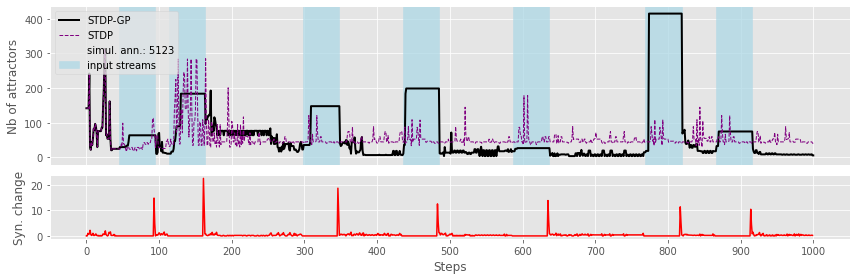

*** nb inputs 7 / eta 0.1 / seed 77 ***
sim_random_gp_1001_50_7_seed77_eta0.1.pkl


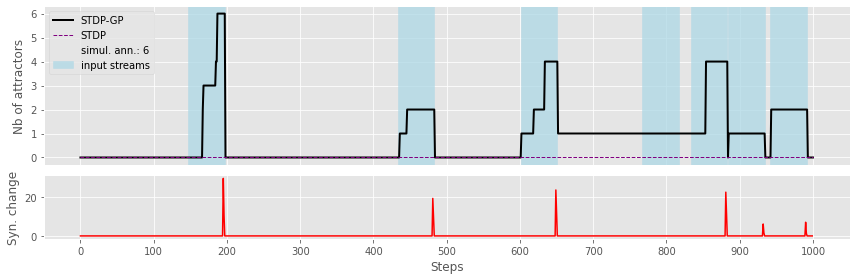

*** nb inputs 7 / eta 0.1 / seed 55 ***
sim_random_gp_1001_50_7_seed55_eta0.1.pkl


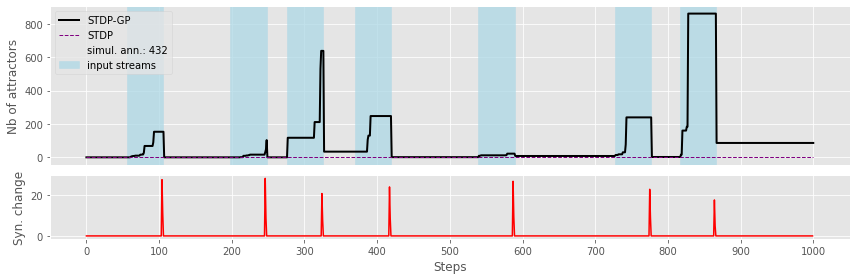

*** nb inputs 7 / eta 0.1 / seed 15 ***
sim_random_gp_1001_50_7_seed15_eta0.1.pkl


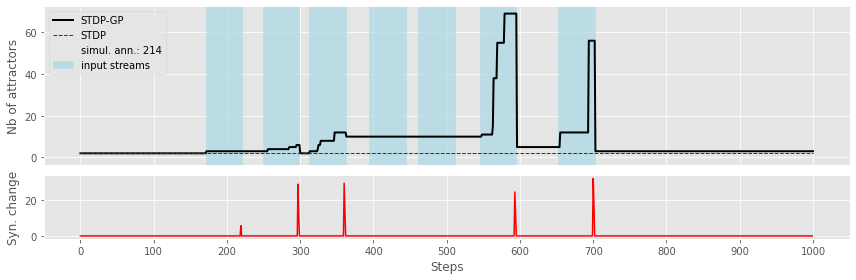

*** nb inputs 9 / eta 0.1 / seed 42 ***
sim_random_gp_1001_50_9_seed42_eta0.1.pkl


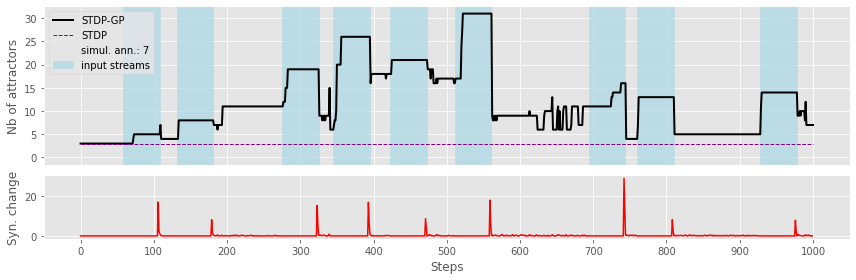

*** nb inputs 9 / eta 0.1 / seed 79 ***
sim_random_gp_1001_50_9_seed79_eta0.1.pkl


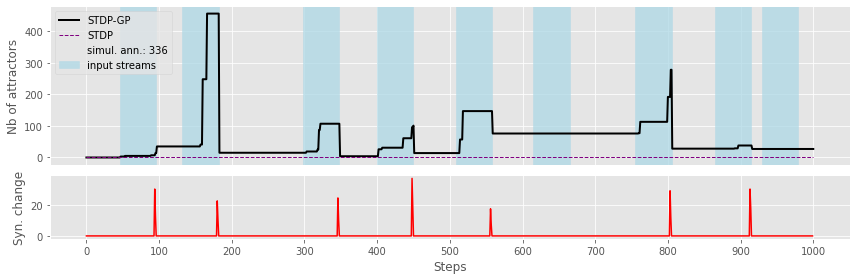

*** nb inputs 9 / eta 0.1 / seed 82 ***
sim_random_gp_1001_50_9_seed82_eta0.1.pkl


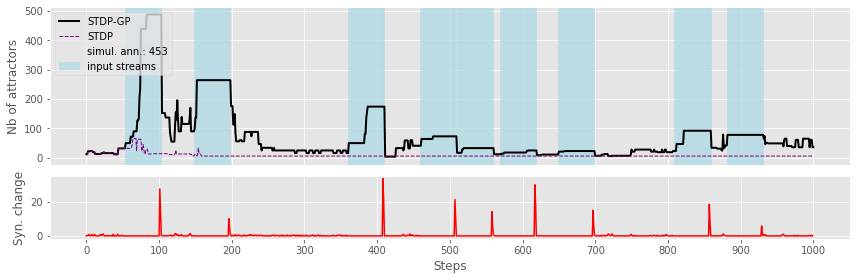

*** nb inputs 9 / eta 0.1 / seed 83 ***
sim_random_gp_1001_50_9_seed83_eta0.1.pkl


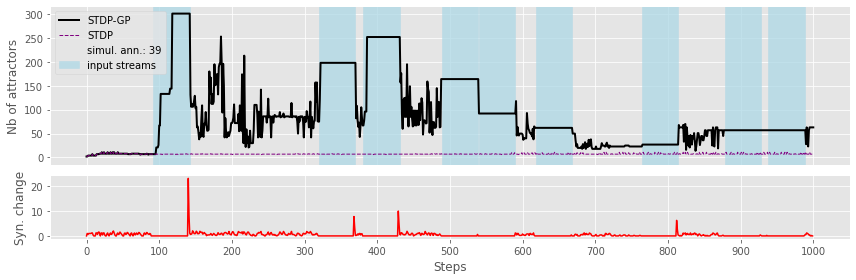

*** nb inputs 9 / eta 0.1 / seed 47 ***
sim_random_gp_1001_50_9_seed47_eta0.1.pkl


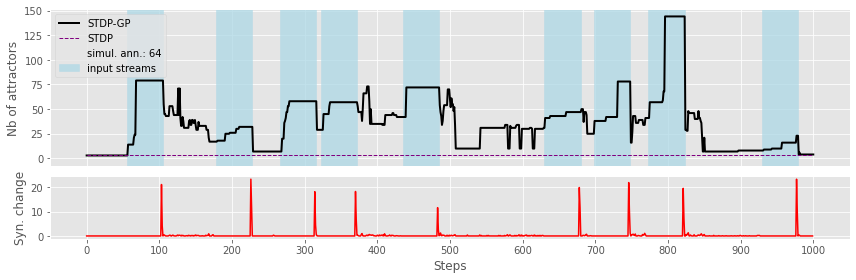

*** nb inputs 9 / eta 0.1 / seed 49 ***
sim_random_gp_1001_50_9_seed49_eta0.1.pkl


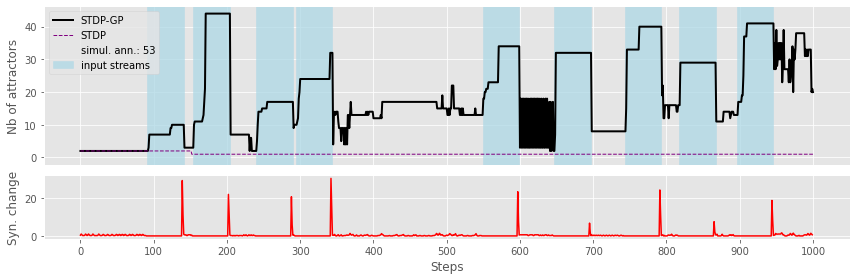

*** nb inputs 9 / eta 0.1 / seed 13 ***
sim_random_gp_1001_50_9_seed13_eta0.1.pkl


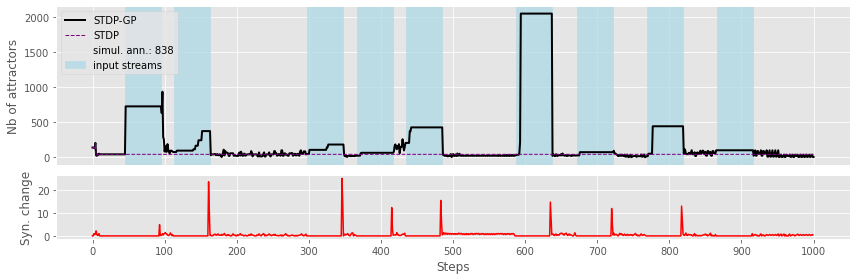

*** nb inputs 9 / eta 0.1 / seed 77 ***
sim_random_gp_1001_50_9_seed77_eta0.1.pkl


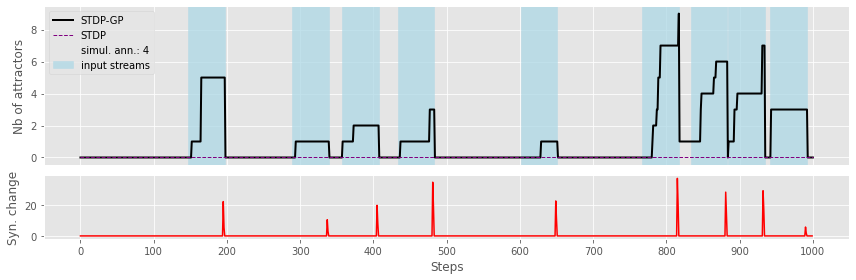

*** nb inputs 9 / eta 0.1 / seed 55 ***
sim_random_gp_1001_50_9_seed55_eta0.1.pkl


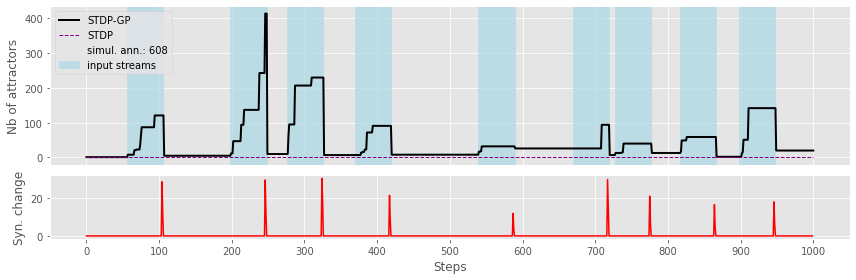

*** nb inputs 9 / eta 0.1 / seed 15 ***
sim_random_gp_1001_50_9_seed15_eta0.1.pkl


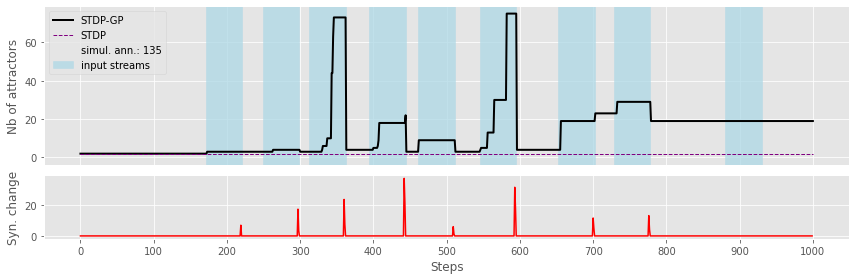

*** nb inputs 11 / eta 0.1 / seed 42 ***
sim_random_gp_1001_50_11_seed42_eta0.1.pkl


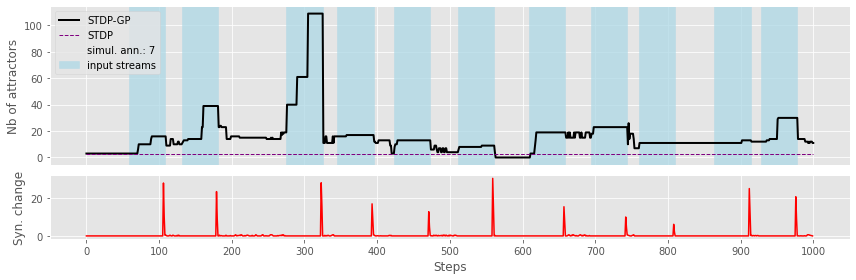

*** nb inputs 11 / eta 0.1 / seed 79 ***
sim_random_gp_1001_50_11_seed79_eta0.1.pkl


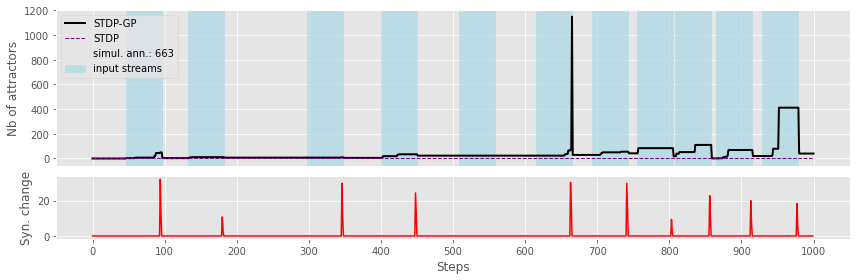

*** nb inputs 11 / eta 0.1 / seed 82 ***
sim_random_gp_1001_50_11_seed82_eta0.1.pkl


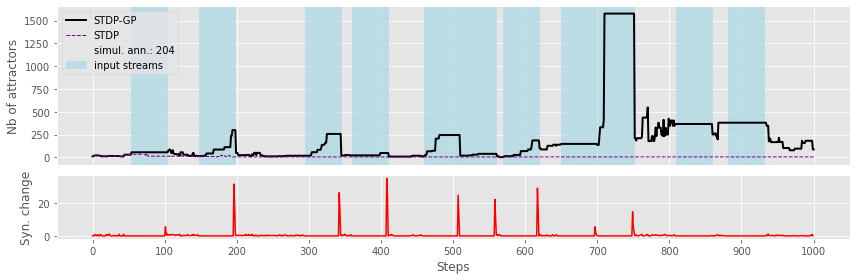

*** nb inputs 11 / eta 0.1 / seed 83 ***
sim_random_gp_1001_50_11_seed83_eta0.1.pkl


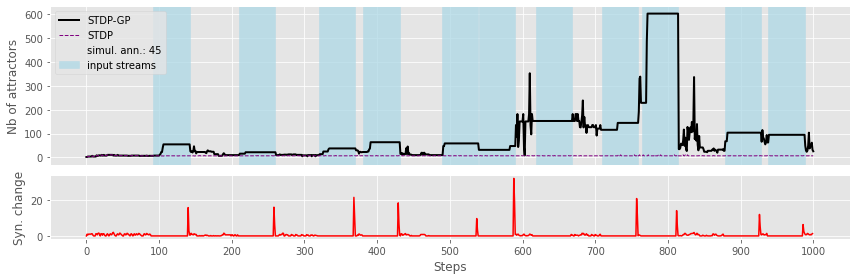

*** nb inputs 11 / eta 0.1 / seed 47 ***
sim_random_gp_1001_50_11_seed47_eta0.1.pkl


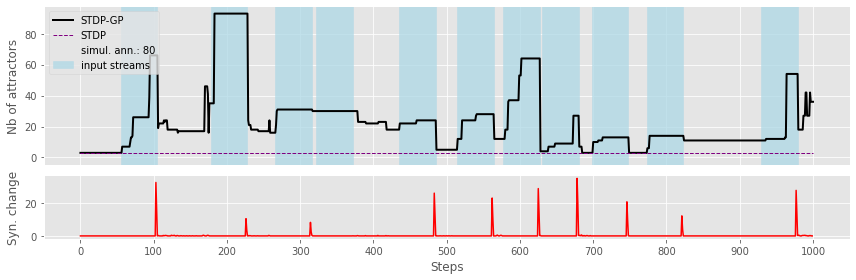

*** nb inputs 11 / eta 0.1 / seed 49 ***
sim_random_gp_1001_50_11_seed49_eta0.1.pkl


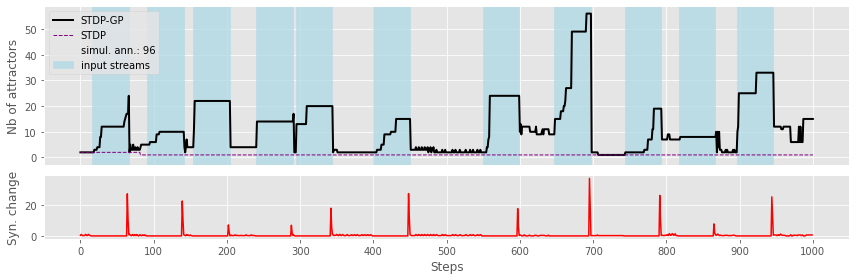

*** nb inputs 11 / eta 0.1 / seed 13 ***
sim_random_gp_1001_50_11_seed13_eta0.1.pkl


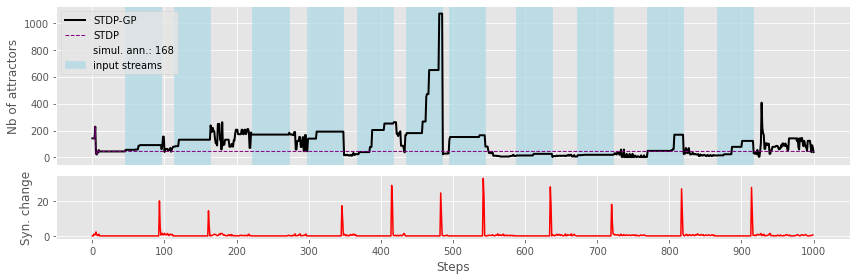

*** nb inputs 11 / eta 0.1 / seed 77 ***
sim_random_gp_1001_50_11_seed77_eta0.1.pkl


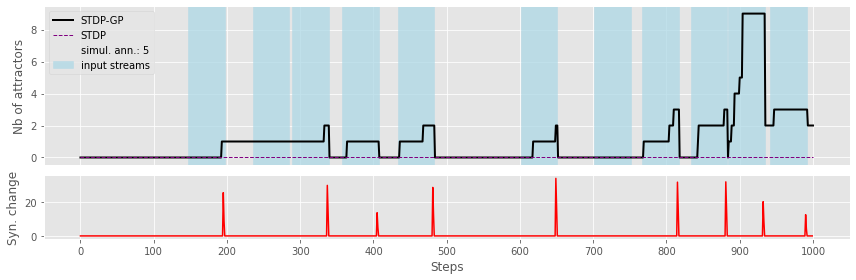

*** nb inputs 11 / eta 0.1 / seed 55 ***
sim_random_gp_1001_50_11_seed55_eta0.1.pkl


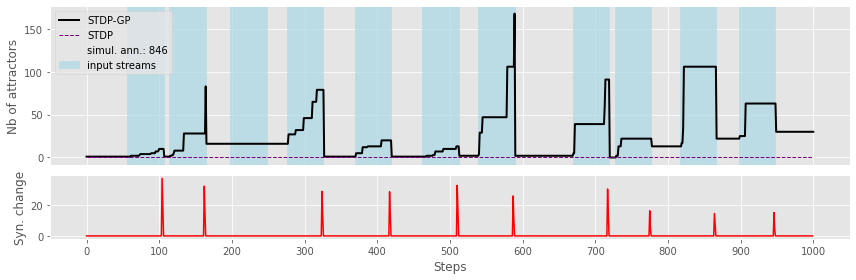

*** nb inputs 11 / eta 0.1 / seed 15 ***
sim_random_gp_1001_50_11_seed15_eta0.1.pkl


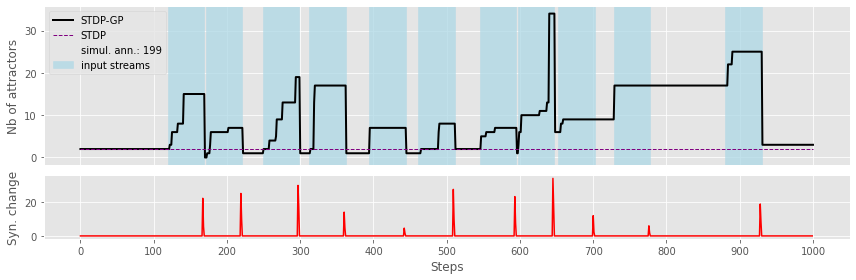

In [ ]:
for nb_inputs in [1, 3, 5, 7, 9, 11]: # [1, 3, 5, 7, 9]:

    for seed in [42, 79, 82, 83, 47, 49, 13, 77, 55, 15]:

        for eta in [0.1, 0.01, 0.001, 0.0001]:

            filespecs = [1001, 50, nb_inputs, seed, eta]
        
            print(f"*** nb inputs {nb_inputs} / eta {eta} / seed {seed} ***")

            results_d = get_results(filespecs)
            
            plot(results_d, filespecs)

## Plots for small "etas"

In [138]:
for seed in [42, 79, 82, 83, 47, 49, 13, 77, 55, 15]:

    filespecs = [1001, 50, 9, seed, 0.0001]
    
    print(f"*** nb inputs {filespecs[2]} / eta {filespecs[4]} / seed {seed} ***")

    results_d = get_results(filespecs)
    plot(results_d, filespecs, save=False)

*** nb inputs 9 / eta 0.0001 / seed 42 ***


FileNotFoundError: [Errno 2] No such file or directory: 'sim_random_stdp_1001_50_9_seed42_eta0.0001.pkl'

## Plots for varying "etas"

In [102]:
def get_results(filespecs=(1001, 50, 9, 13, [0.01, 0.001, 0.0001])):

    input_length = filespecs[0]
    trigger_length = filespecs[1]
    nb_triggers = filespecs[2]
    seed = filespecs[3]
    etas =  filespecs[4]
    mode = "stdp-gp"
    results_d = {}

    results_d = {}

    for eta in etas:

        filename = f"sim_{network}_{mode}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}_eta{eta}.pkl"

        with open(filename, "rb") as fh:
            results = pickle.load(fh)

        results_d[eta] = {}
        nb_attractors = results[0][-input_length:]
        results_d[eta]["nb_attractors"] = nb_attractors
        ticks = results[1]
        results_d[eta]["ticks"] = ticks
        synapses_l = results[2]
        abs_diff_l = compute_abs_diffs(synapses_l)
        results_d[eta]["syn_change"] = abs_diff_l

    return results_d

In [103]:
results_d = get_results()

FileNotFoundError: [Errno 2] No such file or directory: 'sim_random_stdp-gp_1001_50_9_seed13_eta0.01.pkl'

In [104]:
etas = list(results_d.keys())
etas.sort()

input_length = 1001
trigger_length = 50
nb_triggers = 10

plt.figure(figsize=(12, 4))

# Chunks start and end points
t0s = results_d[etas[0]]["ticks"]
t1s = [start + trigger_length for start in t0s]

# Plot number of attractors
for eta in etas:
    plt.plot(range(input_length), results_d[eta]["nb_attractors"], linewidth=2, label=f'$\eta={eta}$')
plt.ylabel('Nb of attractors', size=12)
plt.grid(True)
plt.tick_params(bottom = False) 
## Add colored regions for each input chunk
for start, end in zip(t0s, t1s):
    plt.axvspan(start, end, color='lightblue', alpha=0.75, label="input streams" if start == t0s[0] else "")
plt.legend(loc="upper left")


fig.tight_layout()
plt.savefig(f"plots/plot_{network}_{input_length}_{trigger_length}_{nb_triggers}_seed{seed}_etas.pdf")
plt.show()

KeyError: 'ticks'

<Figure size 864x288 with 0 Axes>

## Attractors

In [41]:
with open("M_best.pkl", "rb") as fh:
    M = pickle.load(fh)

In [42]:
A = netM_to_aut(M)
attractors = get_simple_cycles(A)

In [43]:
attractors

{(6, 7): (((6,), (6, 7), (7,)), 3)}

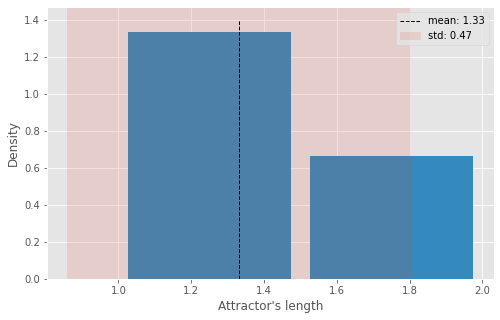

In [44]:
# stats of attractors
SCC = list(attractors.keys())[0] # first SCC
attractors_SCC = attractors[SCC][0]

lens = [len(c) for c in attractors_SCC]
len_mean = np.mean(lens).round(2)
len_std = np.std(lens).round(2)
len_mean, len_std

plt.figure(figsize=(8, 5))

plt.hist(lens, bins=np.max(lens), density=True, rwidth=0.9, color="C1")
ymin, ymax = plt.ylim()
plt.vlines(len_mean, ymin, ymax, color="black", linestyles="--", linewidth=1, label=f"mean: {len_mean}")
plt.axvspan(len_mean-len_std, len_mean+len_std, color='C0', alpha=0.15, label=f"std: {len_std}")

plt.legend(loc="upper left")

plt.legend()
plt.xlabel("Attractor's length")
plt.ylabel("Density")
plt.savefig(f"plots/attractors_stats.pdf")
plt.show()

In [110]:
attr_0 = attractors_SCC[0]
attr_1 = attractors_SCC[1]
attr_2 = attractors_SCC[2]

In [111]:
set(attr_0).intersection(set(attr_1).intersection(set(attr_2)))

set()

In [326]:
attrs = [attr_0, attr_1, attr_2]
inputs_streams = []

for i in range(3):

    attr = attrs[i]
    inputs_stream = []

    for j in range(len(attr)-1):
        x0_x1 = (attr[j], attr[j+1])
        input = dict(A[1])[x0_x1]
        inputs_stream.append(input)

    inputs_streams.append(inputs_stream)

In [327]:
for i in range(3):
    print(len(attrs[i]), inputs_streams[i])

26 [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
25 [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0]
26 [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]


In [328]:
n = 5
U = n*inputs_streams[0] + n*inputs_streams[1] + n*inputs_streams[2]
U = {k : v for k, v in zip(range(len(U)), U)}

history, _, _ = simulation(M[0], M[1], M[2], M[3], M[4], U, epoch=len(U))

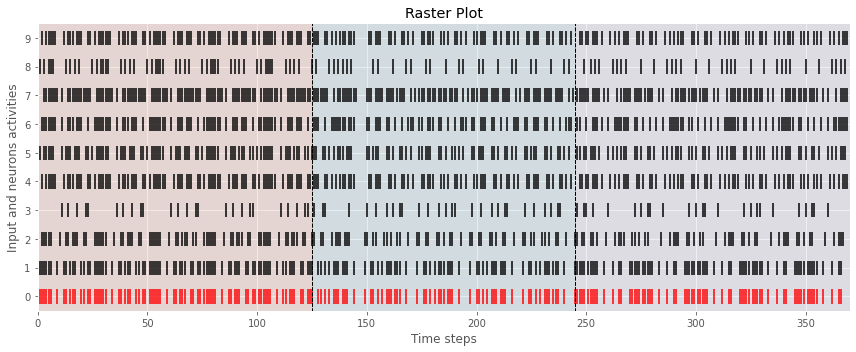

In [329]:
fig, ax = plt.subplots(figsize=(12, 5))

inputs = history[0, :]
activity = history[1:, :]

input_times = np.where(inputs == 1)[0]      # Find indices where spikes occur
ax.vlines(input_times, 0 - 0.25, 0 + 0.25, color='red')

for neuron_idx, spikes in enumerate(activity):
    spike_times = np.where(spikes == 1)[0]  # Find indices where spikes occur
    ax.vlines(spike_times, neuron_idx + 1 - 0.25, neuron_idx + 1 + 0.25, color='black')

colors = ['C0', 'C1', 'C2']
ymin, ymax = plt.ylim()
l = 0
for i, u in enumerate(inputs_streams):
    u = l + n*len(u)
    ax.axvspan(l, u, alpha=0.1, color=colors[i])
    ax.vlines([l, u], ymin, ymax, color="black", linestyles="--", linewidths=1)
    l = u

# Set the limits and labels
ax.set_xlim(0, activity.shape[1])
ax.set_ylim(-0.5, activity.shape[0]+0.5)
ax.set_xlabel('Time steps')
ax.set_ylabel('Input and neurons activities')
ax.set_yticks(range(activity.shape[0]+1))
ax.set_title('Raster Plot')

# Show the plot
plt.tight_layout()
plt.savefig(f"plots/attractors_raster_plot.pdf")
plt.show()


- **OK** attractors' stats
- **OK** raster plot
- STDP with variable learning rate
- **OK** re-launch simuls

**Remarques**
- le fait d'utiliser toujours le même `M[0]` dans le STDP-cipping semble faire tout foirer...
- le rôle du adatpive learning rate n'est pas encore clair...